**Predict the overall ranking of a football player**
=================================
**-BY *Arati Bhat, Madhu Lokanath* and *Nithin Ashok***
**Abstract:**
--------------------
In this project, **Predict the overall ranking of a European Football players**, we are predicting the overall ranking of European Football players( which in our case is target variable ) by considering the individual player statistics such as player's potential, agility, stamina and so on as the features(instances). So with the individual player's overall ranking, it will be easy for the the bidders to choose the players for their team at the auction.

----------


**Introduction:**
--------------------------
Here we are basically building a supervised learning model to predict the overall ranking of football players. To train this model, we collected data from various websites which provides various kind of information about players and and their statistics. Once the model is trained using the data collected above, the model is able to predict the overall ranking of any new upcoming players.


----------


#### <i class="icon-file"></i> **Data Gathering:**
--------------------
We agreed that the regular-season data of European Football would be the most effective for building a machine-learning model that would model the correlation of a set of features into a overall ranking of each individual . That way, we could predict the overall ranking of any player in future given their set of features.

Now there’s no lack of sites hosting data on football games, and we found them on http://www.football-data.co.uk/englandm.php and on kaggle website, which had the cumulative data on all the teams for many years.

It looks like a giant set of spreadsheets linked together on websites. Getting the data into the format we needed required a bit of filtering. But eventually we had a nice comma separated value (CSV) file with the 2008 to 2015 regular-season historical data. This had lot of null and missing values which we did preprocessing. The information we have extracted explains a few key factors that affect the player's overall ranking, such as potential, crossing, finishing, short passing, free kick accuracy, ball control, sprint speed and so on.


----------

**Performance Measure:**
----------------------------------------
Since our problem is of regression type, there are three different approaches to evaluate the quality of prediction of the model which are as follows :

 1. **Estimator score method:** Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.
 2. **Scoring parameter:** Model-evaluation tools using cross-validation (such as model_selection.cross_val_score) which rely on an internal scoring strategy.
 3. **Metrics functions:** The metrics module implements functions assessing prediction error for specific purposes.
 
 In our project, we are using both **scoring parameter** (i.e., ***model_selection.cross_val_score***) and **metrics function**(i.e., ***metrics.mean_absolute_error*** and ***metrics.mean_squared_error***) to evaluate the performance of our model.

In [4]:
import pandas as pd
import csv
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing

features= pd.read_csv('/Users/bhata/Downloads/Data3.csv',sep=",",usecols=(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22))
target1= pd.read_csv('/Users/bhata/Downloads/Data3.csv',sep=",",usecols=(0,23))
targe1= pd.read_csv('/Users/bhata/Downloads/Data3.csv',sep=",",usecols=(0,23))
 
target=targe1.pop("overall_rating")

target1.head()
target1.shape
#print(targe1)
#plt.boxplot(targe1["overall_rating"])
print(target1)

Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,train_size=0.8)

                       player_name  overall_rating
0               Aaron Appindangoye       63.600000
1                  Aaron Cresswell       66.969697
2                      Aaron Doran       67.000000
3                    Aaron Galindo       69.086957
4                     Aaron Hughes       73.240000
5                       Aaron Hunt       77.259259
6                       Aaron Kuhl       60.571429
7                     Aaron Lennon       79.769231
8                     Aaron Lennox       48.000000
9                    Aaron Meijers       67.052632
10                   Aaron Mokoena       71.625000
11                      Aaron Mooy       66.285714
12                  Aaron Muirhead       62.250000
13                    Aaron Niguez       66.925926
14                    Aaron Ramsey       78.500000
15                   Aaron Splaine       54.625000
16           Aaron Taylor-Sinclair       62.611111
17                 Aaron Wilbraham       61.772727
18               Aatif Chahecho

In [2]:
#features.head()
features.shape
print(features)

       acceleration  aggression    agility    balance  ball_control  \
0         60.000000   65.800000  59.000000  65.000000     48.600000   
1         76.000000   65.060606  75.242424  84.727273     61.787879   
2         75.538462   59.115385  77.615385  80.730769     68.615385   
3         50.217391   69.304348  62.826087  44.086957     63.173913   
4         51.120000   69.680000  50.760000  64.160000     60.160000   
5         77.259259   54.444444  78.407407  71.037037     78.037037   
6         70.285714   74.571429  60.000000  80.000000     62.571429   
7         93.423077   52.461538  91.923077  87.230769     82.846154   
8         15.000000   21.000000  31.000000  24.000000     22.000000   
9         74.157895   72.578947  68.842105  74.105263     71.578947   
10        62.875000   70.000000  55.000000  68.000000     67.875000   
11        72.750000   64.142857  70.571429  65.857143     69.214286   
12        64.500000   66.500000  49.000000  53.000000     48.000000   
13    

In [5]:
#Visualize Target
target1.describe()

,overall_rating
count,10849.000000
mean,66.797304
std,6.226787
min,43.000000
25%,62.800000
50%,66.705882
75%,70.916667
max,92.192308


{'boxes': [<matplotlib.lines.Line2D at 0x227a2a536a0>],
 'caps': [<matplotlib.lines.Line2D at 0x227a2a60fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x227a2a70978>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x227a2a6aa20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x227a2a53f60>,
  <matplotlib.lines.Line2D at 0x227a2a60898>]}

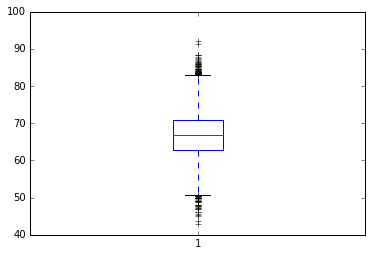

In [6]:
#Visualize Target
plt.boxplot(target1["overall_rating"])

In [7]:
#Visualize Features
features.describe()

,acceleration,aggression,agility,balance,ball_control,crossing,curve,dribbling,finishing,free_kick_accuracy,...,long_shots,penalties,potential,short_passing,shot_power,sliding_tackle,sprint_speed,stamina,standing_tackle,vision
count,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,...,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000,10849.000000
mean,66.414298,59.527737,64.415989,64.495140,61.174877,52.905776,50.455029,56.922314,47.880475,47.352956,...,50.819192,53.690488,72.079286,60.414682,59.495290,47.127213,66.805876,65.474664,49.453950,55.896863
std,11.548649,14.824683,11.855565,10.972685,14.455443,16.047790,16.834636,16.749605,18.021844,16.215360,...,17.174497,13.772964,5.793252,13.411564,15.172732,20.043160,11.171867,11.221627,20.226040,13.681189
min,15.000000,11.000000,21.000000,20.000000,9.000000,6.000000,5.714286,5.142857,5.000000,6.000000,...,6.000000,9.000000,51.000000,10.571429,9.923077,5.000000,17.000000,16.000000,6.000000,8.000000
25%,60.000000,50.500000,57.724138,58.947368,57.000000,43.588235,39.529412,49.266667,32.600000,35.642857,...,39.000000,44.900000,68.000000,55.687500,52.142857,26.552632,61.000000,60.142857,29.161290,48.000000
50%,67.818182,62.291667,65.000000,65.000000,64.250000,56.333333,51.750000,61.080000,49.900000,48.000000,...,54.833333,55.000000,72.000000,63.000000,62.833333,49.875000,68.100000,67.153846,55.111111,57.000000
75%,74.320000,70.571429,72.724138,71.750000,70.315789,64.652174,63.000000,68.666667,63.000000,59.615385,...,63.954545,63.880000,76.000000,69.000000,70.333333,64.750000,74.444444,72.857143,67.000000,65.647059
max,95.787879,93.666667,94.666667,94.312500,95.769231,89.357143,92.571429,96.461538,92.230769,90.488889,...,90.000000,92.000000,95.230769,95.181818,93.076923,94.366667,95.696970,93.181818,90.200000,95.681818


**Performance Measure:**
----------------------------------------
Since our problem is of regression type, there are three different approaches to evaluate the quality of prediction of the model which are as follows :

 1. **Estimator score method:** Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve.
 2. **Scoring parameter:** Model-evaluation tools using cross-validation (such as model_selection.cross_val_score) which rely on an internal scoring strategy.
 3. **Metrics functions:** The metrics module implements functions assessing prediction error for specific purposes.
 
In our project, we are using both **scoring parameter** (i.e., ***model_selection.cross_val_score***) and **metrics function**(i.e., ***metrics.mean_absolute_error*** and ***metrics.mean_squared_error***) to evaluate the performance of our model.

In [8]:
#Linear Regression
#Default values
n=np.mean(Ytest)
#print(n)
clf = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753417
Accuracy: 0.76
mean absoluter error: 2.378649
Baseline Mean squared error: 29.71
Mean squared error: 9.42


In [9]:
#Linear Regression
#changing n_jobs 
n=np.mean(Ytest)
#print(n)
clf = linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=0)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753417
Accuracy: 0.76
mean absoluter error: 2.378649
Baseline Mean squared error: 29.71
Mean squared error: 9.42


In [10]:
#Linear Regression
#Changing fit_intercept value
n=np.mean(Ytest)
#print(n)
clf = linear_model.LinearRegression(fit_intercept=False, normalize=False, copy_X=True, n_jobs=1)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.751949
Accuracy: 0.76
mean absoluter error: 2.388687
Baseline Mean squared error: 31.88
Mean squared error: 9.49


In [11]:
#Lasso
#Default values
n=np.mean(Ytest)
#print(n)
clf=linear_model.Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753396
Accuracy: 0.76
mean absoluter error: 2.378728
Baseline Mean squared error: 29.43
Mean squared error: 9.43


In [12]:
#Lasso
#changing alpha value
n=np.mean(Ytest)
#print(n)
clf=linear_model.Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print("Baseline Mean squared error: %.2f" % np.mean((clf.predict(Xtest) - n) ** 2))
print("Mean squared error: %.2f" % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753396
Accuracy: 0.76
mean absoluter error: 2.378728
Baseline Mean squared error: 29.43
Mean squared error: 9.43


In [13]:
#Lasso
#changing random state value
n=np.mean(Ytest)
#print(n)
clf=linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=15, selection='cyclic')
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.748504
Accuracy: 0.75
mean absoluter error: 2.405936
Baseline Mean squared error: 27.17
Mean squared error: 9.72


In [14]:
#Ridge
# Default values
n=np.mean(Ytest)
#print(n)
clf = linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753417
Accuracy: 0.76
mean absoluter error: 2.378649
Baseline Mean squared error: 29.71
Mean squared error: 9.42


In [15]:
#Ridge
#Changing alpha value
n=np.mean(Ytest)
#print(n)
clf = linear_model.Ridge(alpha=5, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753417
Accuracy: 0.76
mean absoluter error: 2.378649
Baseline Mean squared error: 29.71
Mean squared error: 9.42


In [16]:
#Ridge
#Changing Random state 
n=np.mean(Ytest)
#print(n)
clf = linear_model.Ridge(fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=10)
clf.fit(Xtrain,Ytrain)

y_pred = clf.predict(Xtest)
#print(mean_squared_error(Ytest,y_pred))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

cross val score: 0.753417
Accuracy: 0.76
mean absoluter error: 2.378649
Baseline Mean squared error: 29.71
Mean squared error: 9.42


Accuracy: 0.92
cross val score: 0.906835
mean absoluter error: 1.338273
Baseline Mean squared error: 33.97
Mean squared error: 3.27


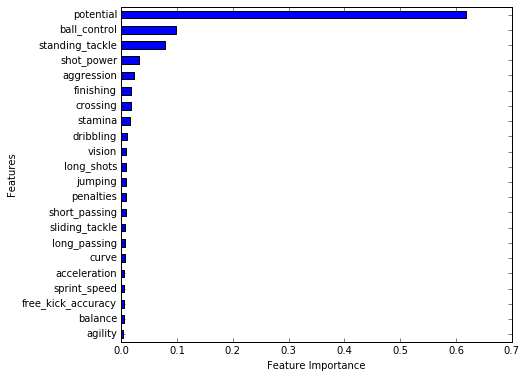

In [17]:
#Random Forest
#changing n_estimators,random_state
n=np.mean(Ytest)
clf = RandomForestRegressor(n_estimators=100,oob_score=True,random_state=10)
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)     
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
y_pred = clf.predict(Xtest)
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))
#feature importances
clf.oob_score_
clf.feature_importances_
feature_importances = pd.Series(clf.feature_importances_, index=features.columns)
feature_importances.sort_values(inplace=True)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
feature_importances.plot(kind = 'barh', figsize=(7,6))

In [18]:
#Random Forest
#Default values
n=np.mean(Ytest)
clf = RandomForestRegressor(n_estimators=10, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)     
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
y_pred = clf.predict(Xtest)
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

Accuracy: 0.91
cross val score: 0.893719
mean absoluter error: 1.422416
Baseline Mean squared error: 34.40
Mean squared error: 3.72


In [19]:
#Random Forest
#Changing n_estimators max_depth, random_state
n=np.mean(Ytest)
clf = RandomForestRegressor(n_estimators=100,  max_depth=25 , oob_score=True,random_state=20)
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)     
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
y_pred = clf.predict(Xtest)
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

Accuracy: 0.92
cross val score: 0.906862
mean absoluter error: 1.324897
Baseline Mean squared error: 34.08
Mean squared error: 3.20


In [26]:
#Random Forest
#Changing max_depth, max_leaf_nodes, random_state
n=np.mean(Ytest)
clf = RandomForestRegressor(n_estimators=10, max_depth=20, max_leaf_nodes = -1, oob_score=False, random_state=42)
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)     
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
y_pred = clf.predict(Xtest)
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))

Accuracy: 0.91
cross val score: 0.890603
mean absoluter error: 1.430958
Baseline Mean squared error: 34.53
Mean squared error: 3.69


Accuracy: 0.80
cross val score: 0.788478
mean absoluter error: 2.045532
Baseline Mean squared error: 40.16
Mean squared error: 7.73


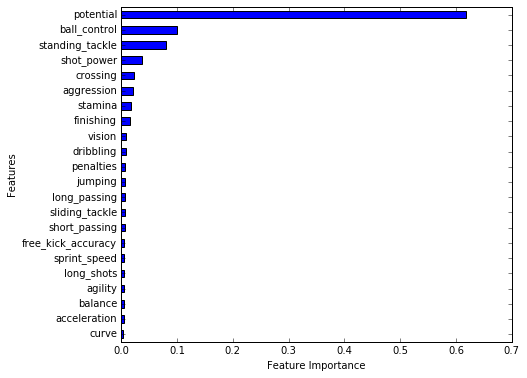

In [21]:
#Decision Tree
n=np.mean(Ytest)
clf = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, presort=False)
clf.fit(Xtrain,Ytrain)
y_pred = clf.predict(Xtest)     
print('Accuracy: %.2f' % clf.score(Xtest, Ytest))
print('cross val score: %f' %np.mean(cross_val_score(clf, Xtrain, Ytrain, cv=10)))
y_pred = clf.predict(Xtest)
print('mean absoluter error: %f' % (mean_absolute_error(Ytest, y_pred)))
print('Baseline Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - n) ** 2))
print('Mean squared error: %.2f' % np.mean((clf.predict(Xtest) - Ytest) ** 2))
#feature importances
#clf.oob_score_
clf.feature_importances_
feature_importances = pd.Series(clf.feature_importances_, index=features.columns)
feature_importances.sort_values(inplace=True)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
feature_importances.plot(kind = 'barh', figsize=(7,6))                            

Top positive features are potential, ball_control ,standing_tackle, crossing, shot_power, aggression, stamina.

Top negative features are balance, curve, agility.

In [22]:
#Scaling
X = np.array(features)
#print(X)
a = preprocessing.scale(X)
#print(a)
#Mean
a.mean(axis = 0)

array([  4.34879138e-16,  -4.88584092e-16,   1.24307320e-15,
         2.65250076e-17,  -1.17888923e-16,  -3.10440830e-16,
         6.54938460e-18,  -1.86657461e-16,   3.52029423e-16,
         3.50064607e-16,  -1.40156831e-16,  -1.69956530e-16,
         1.06427500e-16,   3.65128192e-17,   9.02177729e-16,
         4.52889945e-16,   5.64556953e-16,  -1.20508677e-16,
         4.95133476e-16,  -1.38192015e-16,  -6.54938460e-17,
        -7.43355153e-17])

In [23]:
#Variance
a.std(axis = 0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])